In [1]:
import wooldridge as woo
import pandas as pd
from statsmodels.formula.api import ols
import matplotlib as plt
import numpy as np

# Interactive Session 1

In [2]:
meap01= woo.data('meap01')
woo.data('meap01',description=True)

name of dataset: meap01
no of variables: 11
no of observations: 1823

+----------+-----------------------------------------------+
| variable | label                                         |
+----------+-----------------------------------------------+
| dcode    | district code                                 |
| bcode    | building code                                 |
| math4    | % students satisfactory, 4th grade math       |
| read4    | % students satisfactory, 4th grade reading    |
| lunch    | % students eligible for free or reduced lunch |
| enroll   | school enrollment                             |
| expend   | total spending, $                             |
| exppp    | expenditures per pupil: expend/enroll         |
| lenroll  | log(enroll)                                   |
| lexpend  | log(expend)                                   |
| lexppp   | log(exppp)                                    |
+----------+-----------------------------------------------+

Michigan Depar

In [3]:
meap01[['math4']].describe()

math4
count  1823.000000
mean     71.908996
std      19.954092
min       0.000000
25%      61.600000
50%      76.400002
75%      87.000000
max     100.000000

In [4]:
#The exact answer to ii)
(meap01[['math4']]==100).sum()

math4    38
dtype: int64

In [5]:
#The answer given by Gretls bins for ii)
(meap01[['math4']]>98.214).sum()


math4    47
dtype: int64

In [6]:
#The exact answer to iii)
(meap01[['math4']]==50).sum()

math4    17
dtype: int64

In [7]:
#The approximate answer as given in the gretl example based on its bins which are either side of 50 for iii)

((meap01[['math4']]>48.214) & (meap01[['math4']]<51.796)).sum()


math4    46
dtype: int64

In [8]:
meap01[['math4','read4']].describe()

math4        read4
count  1823.000000  1823.000000
mean     71.908996    60.061876
std      19.954092    19.147292
min       0.000000     0.000000
25%      61.600000    48.900002
50%      76.400002    62.700001
75%      87.000000    73.900002
max     100.000000   100.000000

In [9]:
meap01[['math4','read4']].corr()

math4     read4
math4  1.000000  0.842728
read4  0.842728  1.000000

In [10]:
meap01[['exppp']].describe()

exppp
count   1823.000000
mean    5194.865478
std     1091.889597
min     1206.881958
25%     4501.541504
50%     5078.252930
75%     5767.141846
max    11957.637695

In [11]:
(6000-5500)/5500

0.09090909090909091

In [12]:
np.log(6000)-np.log(5500)

0.08701137698962924

# Slides 1

In [13]:
wage1= woo.data('wage1')
woo.data('wage1', description=True)


name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

In [14]:
female=wage1['female']==1
wagefemale=wage1[female]
wagemale=wage1[~female]

In [15]:
pd.concat([wagefemale[['wage']].describe(),wagemale[['wage']].describe()],axis=1)

wage        wage
count  252.000000  274.000000
mean     4.587659    7.099489
std      2.529363    4.160858
min      0.530000    1.500000
25%      3.000000    4.142500
50%      3.750000    6.000000
75%      5.510000    8.765000
max     21.629999   24.980000

<AxesSubplot:title={'center':'male'}, ylabel='Frequency'>

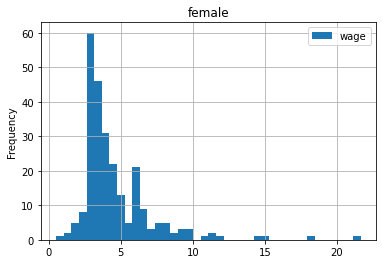

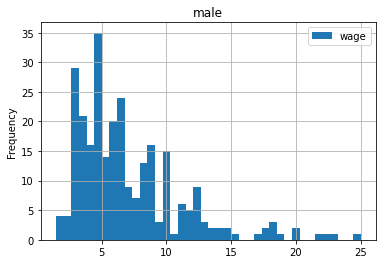

In [16]:
plt.rcParams['figure.figsize'] = [10, 5]
wagefemale.plot(kind='hist',y='wage',bins=40,title='female',grid=True)
wagemale.plot(kind='hist',y='wage',bins=40,title='male',grid=True)


In [17]:
mod=ols('wage~female',data=wage1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     68.54
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           1.04e-15
Time:                        09:12:59   Log-Likelihood:                -1400.7
No. Observations:                 526   AIC:                             2805.
Df Residuals:                     524   BIC:                             2814.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0995      0.210     33.806      0.0

In [18]:
mod=ols('lwage~educ+exper+tenure',data=wage1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Sat, 07 Jan 2023   Prob (F-statistic):           9.13e-43
Time:                        09:12:59   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729      0.0